# PASCAL VOC Exploratory Notebook

<br>

In this notebook an explorative analyisis of the PASCAL VOC 2007 dataset is provided to better understand the distribution of the classes and the number of instances per image and class in the images.

In [1]:
import os
os.chdir('../')
from object_counting.objects_counter.utils.data_generator import DataGenerator

Using TensorFlow backend.


## Load dataset

In [2]:
sets = ['./data/pascal_voc/ImageSets/Main/train.txt',
        './data/pascal_voc/ImageSets/Main/val.txt',
        './data/pascal_voc/ImageSets/Main/test.txt']
setnames = ['train', 'val', 'test']
images_folder = './data/pascal_voc/JPEGImages/'
annotations_folder = './data/pascal_voc/Annotations/'
annotations_ext = 'xml'

In [3]:
classes = ['aeroplane', 'bicycle', 'bird', 'boat',
           'bottle', 'bus', 'car', 'cat',
           'chair', 'cow', 'diningtable', 'dog',
           'horse', 'motorbike', 'person', 'pottedplant',
           'sheep', 'sofa', 'train', 'tvmonitor']

In [4]:
dataset = DataGenerator(classes,
                         count_model='glance',
                         base_model='vgg16',
                         input_shape=(224,224,3),
                         grid_division=None)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
_, y = dataset.load_dataset(sets=sets,
                            images_folder=images_folder,
                            annotations_folder=annotations_folder,
                            annotations_ext=annotations_ext,
                            setnames=setnames,
                            h5dataset_path=None,
                            h5saving_folder=None,
                            h5saving_file=None,
                            load_into_memory=True,
                            serialize_cells=False,
                            gt_only=True)

Loading dataset and computing features: 100%|██████████| 4952/4952 [00:23<00:00, 211.34it/s]


In [6]:
train_set = y[0]
val_set = y[1]
test_set = y[2]

## Some graphs and tables

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from collections import Counter

### Instances per image

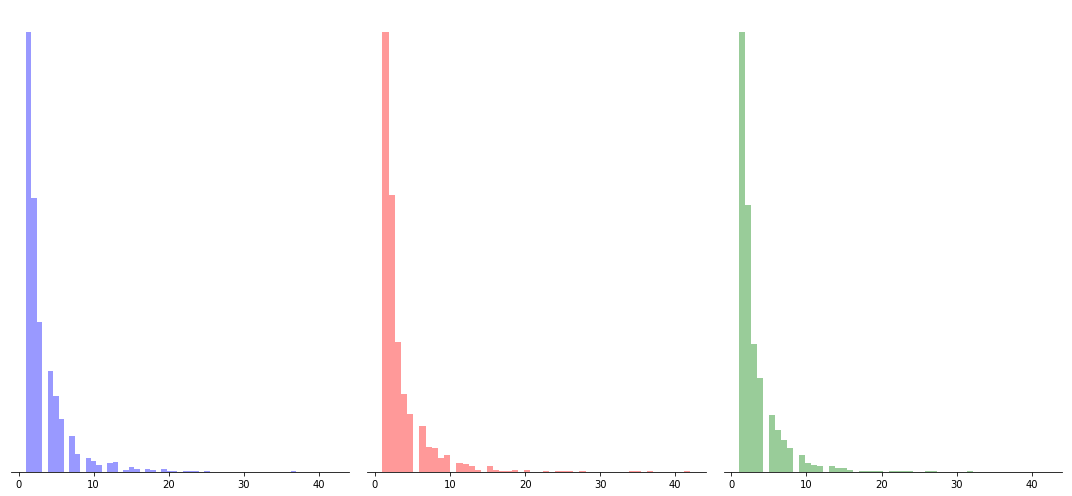

In [8]:
# Set up the matplotlib figure
f, axes = plt.subplots(1, 3, figsize=(15, 7), sharex=True)
sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
sns.distplot(train_set.sum(axis=1).squeeze(), color="b", kde=False, ax=axes[0])
# Plot a kernel density estimate and rug plot
sns.distplot(val_set.sum(axis=1).squeeze(), color="r", kde=False, ax=axes[1])
# Plot a filled kernel density estimate
sns.distplot(test_set.sum(axis=1).squeeze(), color="g", kde=False, ax=axes[2])

plt.setp(axes, yticks=[])
plt.tight_layout()

In [9]:
train_counter = Counter(train_set.sum(axis=1))
val_counter = Counter(val_set.sum(axis=1))
test_counter = Counter(test_set.sum(axis=1))

In [10]:
print(tabulate([[k, v] for k,v in train_counter.most_common()], headers=['Instances', 'Images']))

  Instances    Images
-----------  --------
          1       905
          2       563
          3       308
          4       208
          5       155
          6       109
          7        73
          8        37
          9        29
         10        22
         13        20
         12        19
         11        14
         15         9
         17         6
         16         5
         19         5
         18         4
         14         3
         37         1
         23         1
         21         1
         24         1
         22         1
         25         1
         20         1


In [11]:
print(tabulate([[k, v] for k,v in val_counter.most_common()], headers=['Instances', 'Images']))

  Instances    Images
-----------  --------
          1       960
          2       604
          3       284
          4       169
          5       127
          6        99
          7        55
          8        53
         10        37
          9        30
         11        19
         12        16
         13        13
         15        12
         16         5
         14         4
         20         4
         19         3
         17         2
         28         2
         18         2
         26         2
         23         2
         35         1
         37         1
         25         1
         42         1
         24         1
         34         1


In [12]:
print(tabulate([[k, v] for k,v in test_counter.most_common()], headers=['Instances', 'Images']))

  Instances    Images
-----------  --------
          1      1905
          2      1155
          3       552
          4       408
          5       246
          6       181
          7       138
          8       102
          9        71
         10        36
         11        30
         13        26
         12        24
         14        18
         15        15
         16         8
         20         5
         18         5
         19         5
         17         4
         22         3
         24         3
         23         2
         26         2
         32         2
         27         2
         21         2
         41         1
         25         1


### Images per class

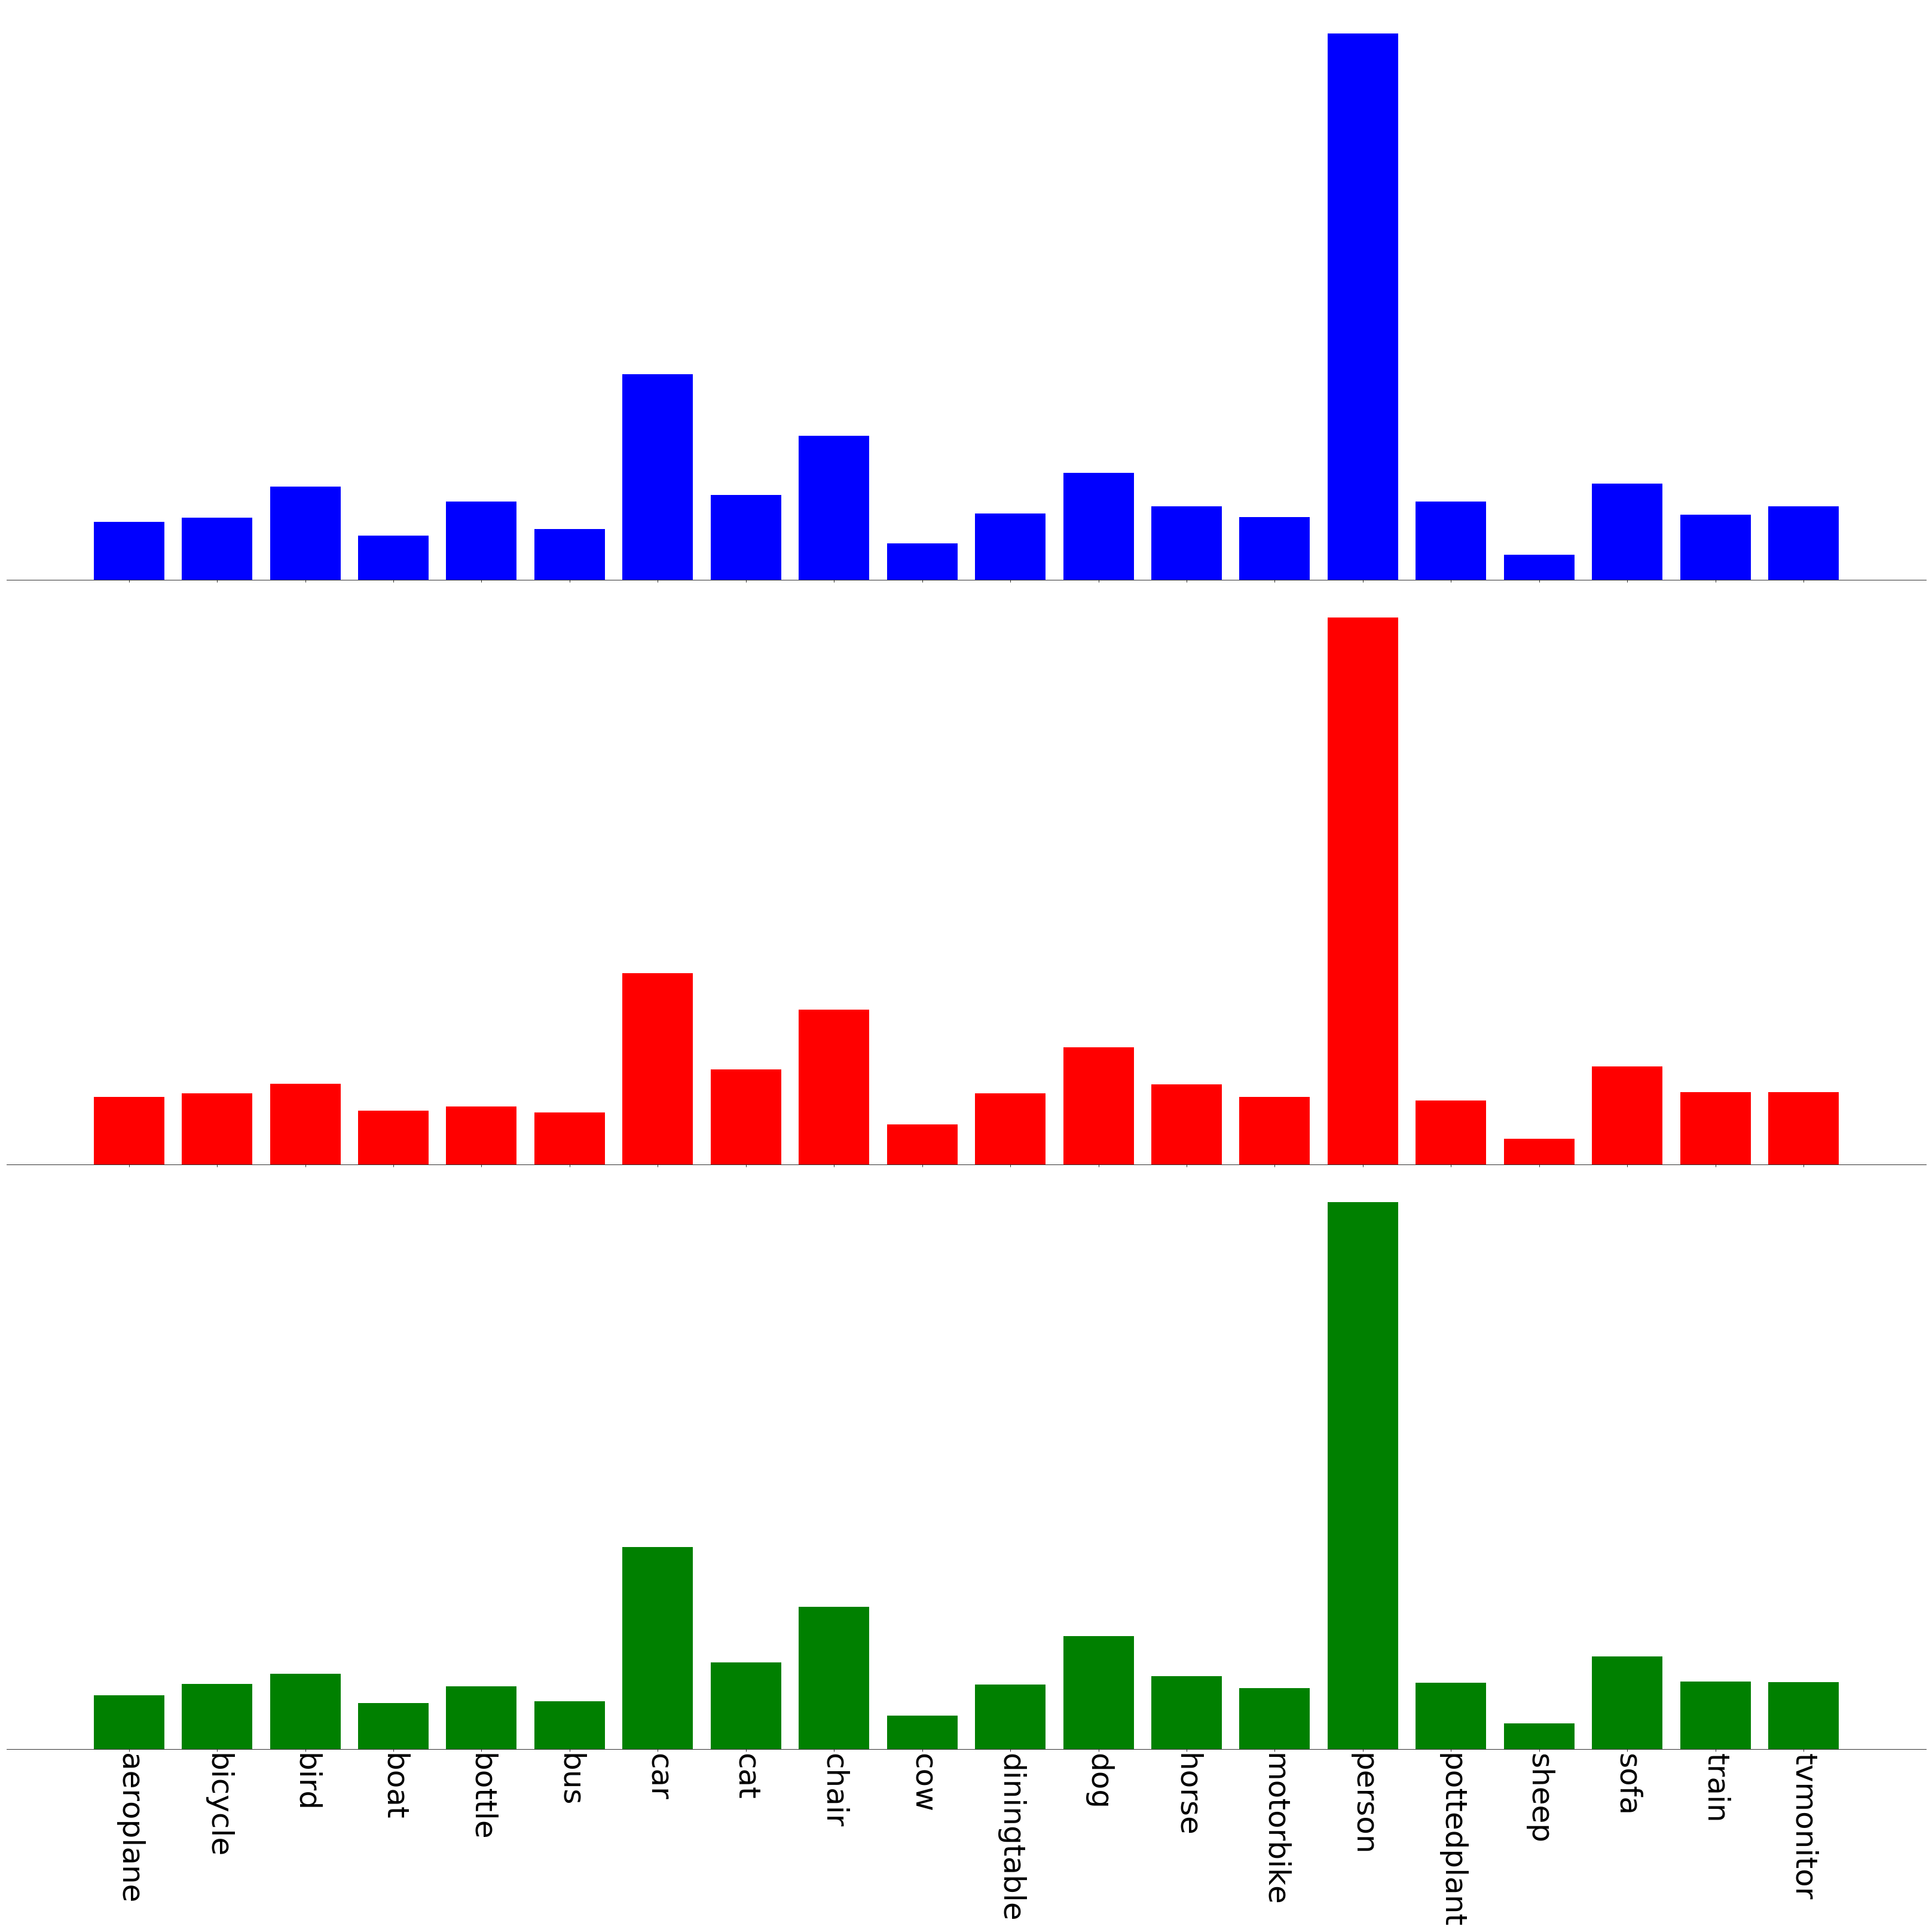

In [13]:
# Set up the matplotlib figure
f, axes = plt.subplots(3, 1, figsize=(45, 45), sharex=True)
sns.despine(left=True)

# Plottick_params(labelsize=6) a simple histogram with binsize determined automatically
axes[0].bar(classes, np.count_nonzero(train_set, axis=0), color='blue')
# Plot a kernel density estimate and rug plot
axes[1].bar(classes, np.count_nonzero(val_set, axis=0), color='red')
# Plot a filled kernel density estimate
axes[2].bar(classes, np.count_nonzero(test_set, axis=0), color='green')
plt.tick_params(labelsize=50, labelrotation=-90)
plt.setp(axes, yticks=[])
plt.tight_layout()

In [14]:
table = np.reshape(np.hstack([np.reshape(classes, (20,1)),
                              np.reshape(np.count_nonzero(train_set, axis=0),(20,1)),
                              np.reshape(np.count_nonzero(val_set, axis=0),(20,1)),
                              np.reshape(np.count_nonzero(test_set, axis=0),(20,1))]), (20,4))
print(tabulate(table, headers=['Class', 'Train', 'Validation', 'Test']))

Class          Train    Validation    Test
-----------  -------  ------------  ------
aeroplane        113           127     205
bicycle          122           133     250
bird             182           151     289
boat              87           101     176
bottle           153           109     240
bus              100            97     183
car              402           359     775
cat              166           178     332
chair            282           290     545
cow               71            75     127
diningtable      130           133     247
dog              210           220     433
horse            144           150     279
motorbike        123           126     233
person          1070          1025    2097
pottedplant      153           120     254
sheep             49            48      98
sofa             188           184     355
train            128           135     259
tvmonitor        144           135     255


### Images per class with only instances of that class

In [15]:
single_class_train = np.count_nonzero(train_set[np.count_nonzero(train_set, axis=1) == 1], axis=0)
single_class_val = np.count_nonzero(val_set[np.count_nonzero(val_set, axis=1) == 1], axis=0)
single_class_test = np.count_nonzero(test_set[np.count_nonzero(test_set, axis=1) == 1], axis=0)

In [16]:
table = np.reshape(np.hstack([np.reshape(classes, (20,1)),
                              np.reshape(single_class_train,(20,1)),
                              np.reshape(single_class_val,(20,1)),
                              np.reshape(single_class_test,(20,1))]), (20,4))
print(tabulate(table, headers=['Class', 'Train', 'Validation', 'Test']))

Class          Train    Validation    Test
-----------  -------  ------------  ------
aeroplane         91           109     169
bicycle           25            34      76
bird             159           134     256
boat              55            65     109
bottle            32            23      50
bus               31            27      65
car              197           179     398
cat              121           121     238
chair             27            30      64
cow               46            52      93
diningtable        2             3      10
dog               97           137     247
horse             31            28      53
motorbike         30            33      56
person           208           200     455
pottedplant       48            41      84
sheep             37            39      75
sofa              20            29      60
train             95            98     203
tvmonitor         37            37      80
